Here we have build models for following non-linear relationships.

we have to build;

1.polynomial reg

2.random forest

3.gradiant boosting tree

4.NN

5. ensemble methods

and choose best one.

# Data Exploration:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')


In [3]:
#drop unwanted columns
unwanted_columns =["Customer Email","Customer Zipcode","Customer Street","Customer Fname","Customer Id","Customer Lname","Customer Segment","Latitude","Longitude","Order Customer Id","order date (DateOrders)","Order Id","Order Item Cardprod Id","Order Item Id","Order Zipcode","Product Card Id","Product Category Id","Product Status","shipping date (DateOrders)","Category Id"]
data.drop(unwanted_columns, axis=1, inplace=True)

**Visualize y vs x:**

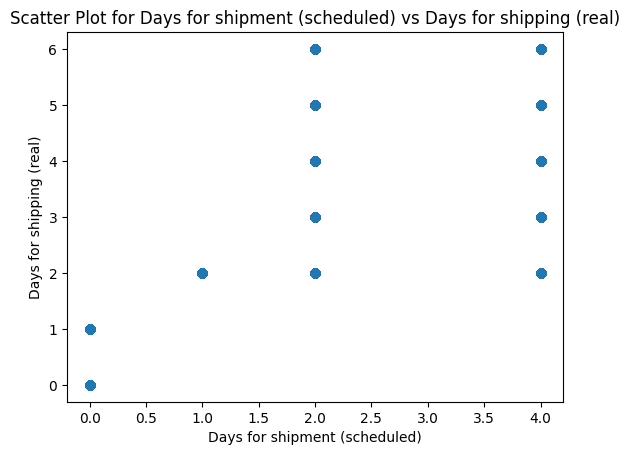

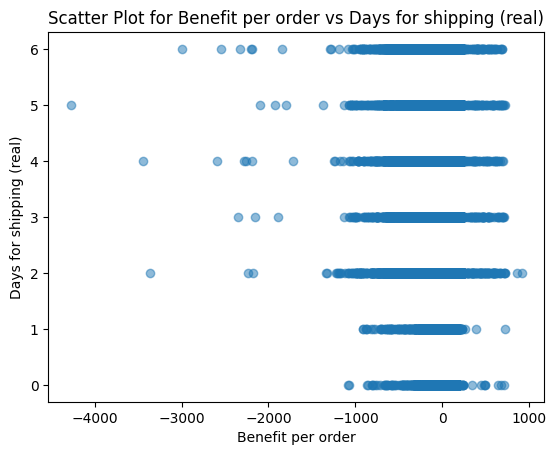

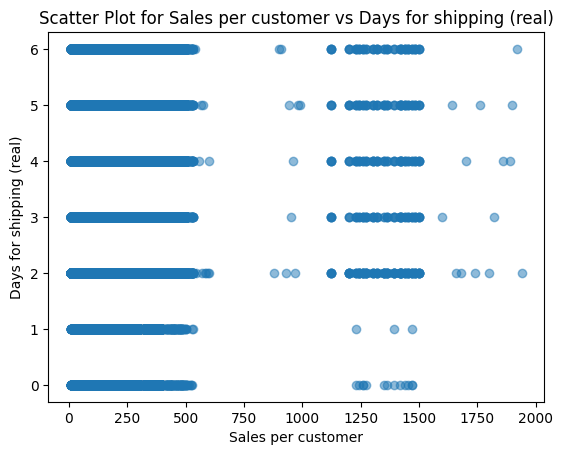

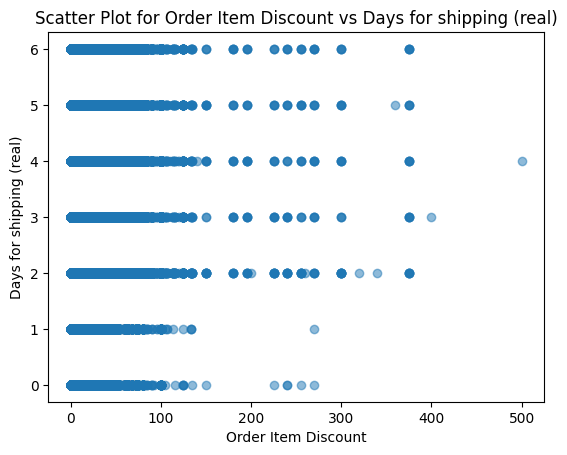

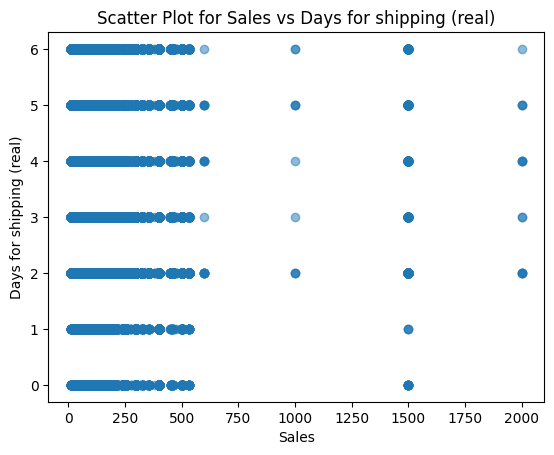

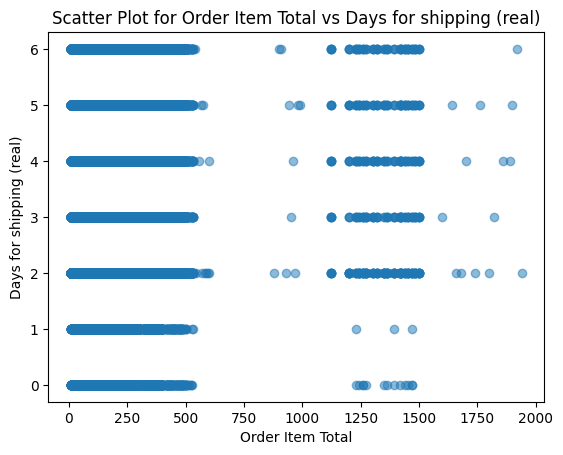

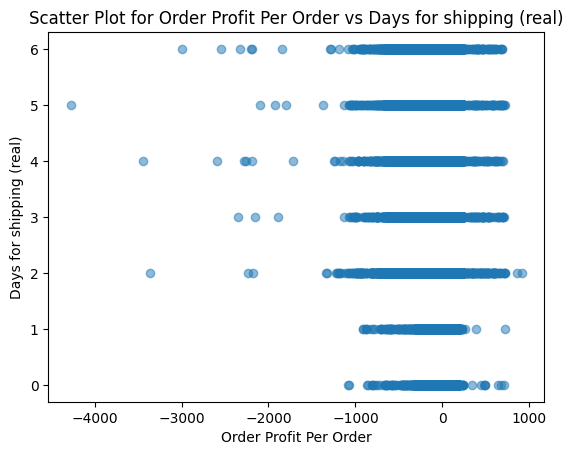

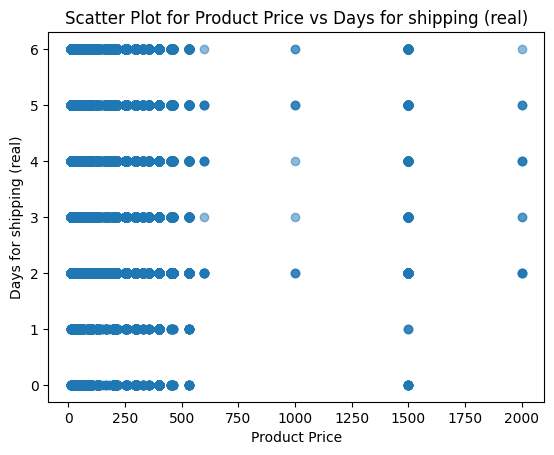

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Select a target variable (y) and multiple predictor variables (x)
y_variable = 'Days for shipping (real)'
x_variables = ['Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer',
               'Order Item Discount','Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Price']

# Create separate scatter plots for each x variable
for x_var in x_variables:
    plt.scatter(data[x_var], data[y_variable], alpha=0.5)
    plt.title(f'Scatter Plot for {x_var} vs {y_variable}')
    plt.xlabel(x_var)
    plt.ylabel(y_variable)
    plt.show()


# Preprocessing:-

In [4]:
# change object data into int or float

label_encoder = LabelEncoder()

columns_to_label_encode = ['Type','Delivery Status', 'Category Name', 'Customer City', 'Customer Country',
                            'Customer State', 'Market', 'Order City', 'Order Country', 'Order Region',
                            'Order State', 'Order Status', 'Product Name', 'Shipping Mode']

for column in columns_to_label_encode:
    data[column] = label_encoder.fit_transform(data[column])

data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode
0,2,5,4,-44.630001,284.250000,1,1,0,66,1,...,1,293.040008,284.250000,-44.630001,7,174,6,79,293.040008,3
1,2,2,4,87.180000,249.080002,0,0,0,66,1,...,1,293.040008,249.080002,87.180000,13,283,6,79,293.040008,3
2,1,3,2,105.489998,293.040008,1,1,0,66,1,...,1,293.040008,293.040008,105.489998,7,440,2,79,293.040008,2
3,1,2,2,25.270000,287.179993,3,0,0,66,1,...,1,293.040008,287.179993,25.270000,7,1002,2,79,293.040008,2
4,1,4,2,21.400000,243.220001,1,1,0,66,1,...,1,293.040008,243.220001,21.400000,15,114,2,79,293.040008,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  int64  
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  int64  
 8   Customer City                  180519 non-null  int64  
 9   Customer Country               180519 non-null  int64  
 10  Customer State                 180519 non-null  int64  
 11  Market                         180519 non-null  int64  
 12  Order City                    

# Model bulding:-

**Polynomial reg:-**

1)y:days for ship(real) ,
x:Days for shipping (scheduled)

Mean Squared Error on Test Set: 2.635414009002556
R-squared on Test Set: -3.622926597368625e-05


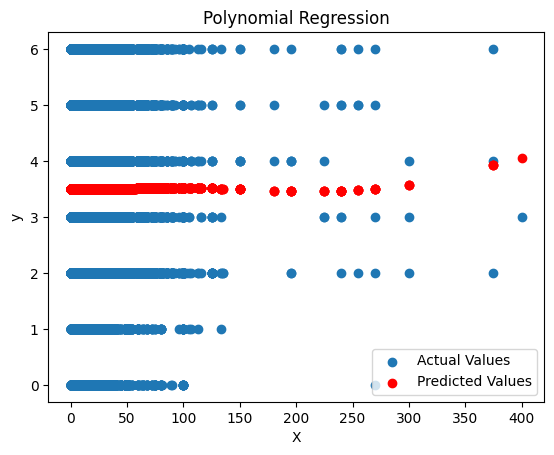

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming your dataset has features and a target column
X1 = data[['Order Item Discount']]
y1 = data['Days for shipping (real)']  # Replace 'target_column' with the name of your target column

# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Apply Polynomial Regression
degree = 5  # You can adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_train_poly1 = poly_features.fit_transform(X_train1)
X_test_poly1 = poly_features.transform(X_test1)

# Train a linear regression model on the polynomial features
model1 = LinearRegression()
model1.fit(X_train_poly1, y_train1)

# Make predictions on the test set
y_pred1 = model1.predict(X_test_poly1)

# Evaluate the model
mse1 = mean_squared_error(y_test1, y_pred1)
r21 = r2_score(y_test1, y_pred1)

print(f'Mean Squared Error on Test Set: {mse1}')
print(f'R-squared on Test Set: {r21}')

# Visualize the results
plt.scatter(X_test1, y_test1, label='Actual Values')
plt.scatter(X_test1, y_pred1, label='Predicted Values', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


(not suitable)

**random forest reg:**

Mean Squared Error on Test Set: 0.2583559887208558
R-squared on Test Set: 0.9019640375720426


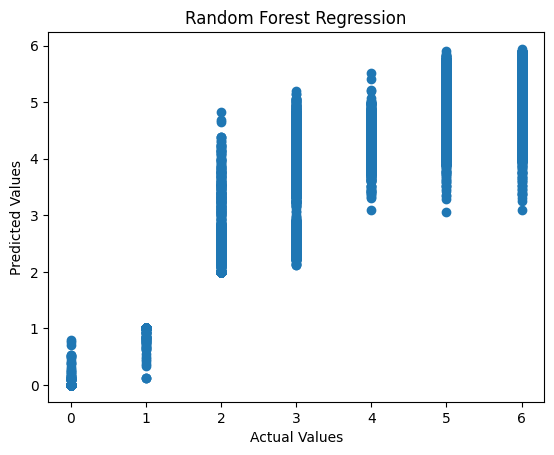

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Assuming your dataset has features and a target column
X2 = data.drop('Days for shipping (real)', axis=1)  # Exclude the target column from features
y2 = data['Days for shipping (real)']

# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = rf_model2.predict(X_test2)

# Evaluate the model
mse2 = mean_squared_error(y_test2, y_pred2)
r22 = r2_score(y_test2, y_pred2)

print(f'Mean Squared Error on Test Set: {mse2}')
print(f'R-squared on Test Set: {r22}')

# Visualize the results
plt.scatter(y_test2, y_pred2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.show()

suitable for bi.

**Gradiant boost trees**

Mean Squared Error on Test Set: 0.3648156399518069
R-squared on Test Set: 0.8615667763363155


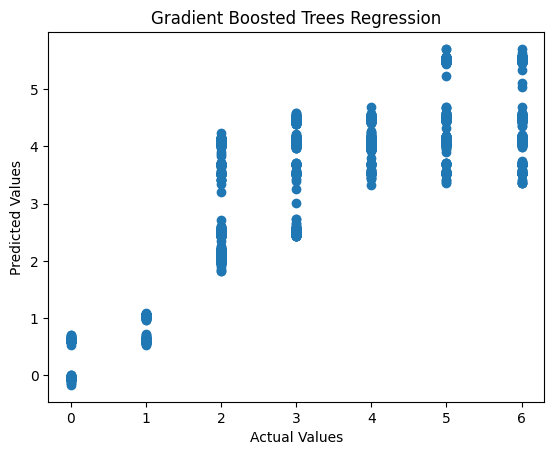

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming your dataset has features and a target column
X3 = data.drop('Days for shipping (real)', axis=1)  # Exclude the target column from features
y3 = data['Days for shipping (real)']

# Split the data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
gb_model3 = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model3.fit(X_train3, y_train3)

# Make predictions on the test set
y_pred3 = gb_model3.predict(X_test3)

# Evaluate the model
mse3 = mean_squared_error(y_test3, y_pred3)
r23 = r2_score(y_test3, y_pred3)

print(f'Mean Squared Error on Test Set: {mse3}')
print(f'R-squared on Test Set: {r23}')

# Visualize the results
plt.scatter(y_test3, y_pred3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosted Trees Regression')
plt.show()

**NN:**

Mean Squared Error on Test Set: 0.8945519530860913
R-squared on Test Set: 0.6605526270290614


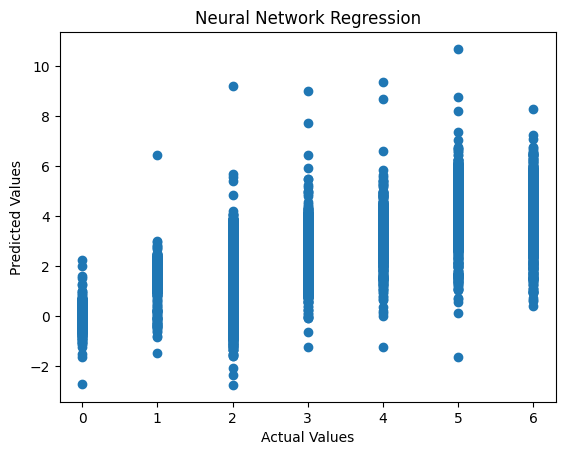

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming your dataset has features and a target column
X4 = data.drop('Days for shipping (real)', axis=1)  # Exclude the target column from features
y4 = data['Days for shipping (real)']

# Split the data into training and test sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Train a Neural Network Regressor
nn_model4 = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
# You can adjust hidden_layer_sizes and max_iter based on your requirements

nn_model4.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred4 = nn_model4.predict(X_test4)

# Evaluate the model
mse4 = mean_squared_error(y_test4, y_pred4)
r24 = r2_score(y_test4, y_pred4)

print(f'Mean Squared Error on Test Set: {mse4}')
print(f'R-squared on Test Set: {r24}')

# Visualize the results
plt.scatter(y_test4, y_pred4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network Regression')
plt.show()


**Ensemble method**

Mean Squared Error (Stacking) on Test Set: 1.606083880067872
R-squared (Stacking) on Test Set: 0.39055417409888193


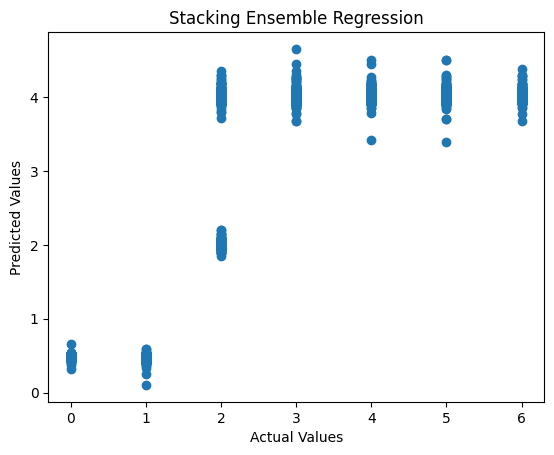

In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
import matplotlib.pyplot as plt

# Assuming your dataset has features and a target column
X5 = data[['Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer',
          'Order Item Discount', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Product Price']]
y5 = data['Days for shipping (real)']

# Split the data into training and test sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Define meta-model
meta_model = LinearRegression()

# Create the stacking regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train5, y_train5)

# Make predictions on the test set
y_pred_stacking = stacking_model.predict(X_test5)

# Evaluate the stacking model
mse_stacking = mean_squared_error(y_test5, y_pred_stacking)
r2_stacking = r2_score(y_test5, y_pred_stacking)

print(f'Mean Squared Error (Stacking) on Test Set: {mse_stacking}')
print(f'R-squared (Stacking) on Test Set: {r2_stacking}')

# Visualize the results
plt.scatter(y_test5, y_pred_stacking)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Stacking Ensemble Regression')
plt.show()


not good